In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('/content/sample_data/student_performance_dataset.csv')

In [ ]:
data.head()

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass


In [5]:
data.tail()

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
703,S492,Male,14,84.658761,78,PhD,Yes,No,50,Fail
704,S301,Male,35,60.278990,83,Masters,No,No,62,Pass
705,S473,Male,25,98.384969,75,Bachelors,Yes,No,57,Fail
706,S307,Female,21,96.148012,84,Bachelors,Yes,No,65,Pass
707,S046,Female,22,80.404392,93,Bachelors,Yes,No,55,Fail


In [6]:
data.dtypes

,0
Student_ID,object
Gender,object
Study_Hours_per_Week,int64
Attendance_Rate,float64
Past_Exam_Scores,int64
Parental_Education_Level,object
Internet_Access_at_Home,object
Extracurricular_Activities,object
Final_Exam_Score,int64
Pass_Fail,object


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  708 non-null    object 
 1   Gender                      708 non-null    object 
 2   Study_Hours_per_Week        708 non-null    int64  
 3   Attendance_Rate             708 non-null    float64
 4   Past_Exam_Scores            708 non-null    int64  
 5   Parental_Education_Level    708 non-null    object 
 6   Internet_Access_at_Home     708 non-null    object 
 7   Extracurricular_Activities  708 non-null    object 
 8   Final_Exam_Score            708 non-null    int64  
 9   Pass_Fail                   708 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 55.4+ KB


In [8]:
data.shape

(708, 10)

In [9]:
data.describe()

,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Final_Exam_Score
count,708.000000,708.000000,708.000000,708.000000
mean,26.132768,78.107722,77.871469,58.771186
std,8.877727,13.802802,14.402739,6.705877
min,10.000000,50.116970,50.000000,50.000000
25%,19.000000,67.550094,65.000000,52.000000
50%,27.000000,79.363046,79.000000,59.500000
75%,34.000000,89.504232,91.000000,64.000000
max,39.000000,99.967675,100.000000,77.000000


In [10]:
#To check value count in each dimension
data.Gender.value_counts()


,count
Gender,
Female,375
Male,333


In [11]:
#To check value count in parental education
data.Parental_Education_Level.value_counts()

,count
Parental_Education_Level,
Bachelors,189
High School,183
Masters,171
PhD,165


In [12]:
data.Internet_Access_at_Home.value_counts()

,count
Internet_Access_at_Home,
No,381
Yes,327


In [13]:
data.Extracurricular_Activities.value_counts()

,count
Extracurricular_Activities,
No,361
Yes,347


In [14]:
data.Pass_Fail.value_counts()

,count
Pass_Fail,
Pass,354
Fail,354


In [15]:
#Data visualization
#1 Outlier Detection using box plot
plt.figure


<function matplotlib.pyplot.figure(num: 'int | str | Figure | SubFigure | None' = None, figsize: 'tuple[float, float] | None' = None, dpi: 'float | None' = None, *, facecolor: 'ColorType | None' = None, edgecolor: 'ColorType | None' = None, frameon: 'bool' = True, FigureClass: 'type[Figure]' = <class 'matplotlib.figure.Figure'>, clear: 'bool' = False, **kwargs) -> 'Figure'>

In [16]:
#This is for color
def countplot(data, hue=None, column=None, order=None, order_hue=None, saturation=5.0, label_dict=None,text=None):
    """
    Parameters:
    - data: DataFrame
        The input DataFrame.
    - hue: str, optional
        Variable in data to map plot aspects to different colors.
    - column: str, optional
        Categorical variable on the x-axis or y-axis.
    - order: list, optional
        Order to plot the categorical levels in the x-axis or y-axis.
    - order_hue: list, optional
        Order to plot the categorical levels in the hue variable.
    - ascending: bool, optional
        Whether to sort the categories in ascending or descending order.
    - saturation: float, optional
        Proportion to desaturate the plot.
    - label_dict: dict, optional
        Dictionary to map values to custom labels.

    """
    plt.figure(figsize=(10, 6))

    if column:
        plt.title(text)
        ax = sns.countplot(x=column, hue=hue, data=data, order=order, hue_order=order_hue, saturation=saturation)
        plt.legend(loc='upper center')

        if order is not None and label_dict is not None:
            plt.xticks(ticks=range(len(order)), labels=[f' {i}: {label_dict[val]}' for i, val in enumerate(order)])

        # Annotate each bar with its count
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2., height, f'{height}', ha="center", va="bottom")

    else:
        raise ValueError("Specify either column_x or column_y")

    plt.show()


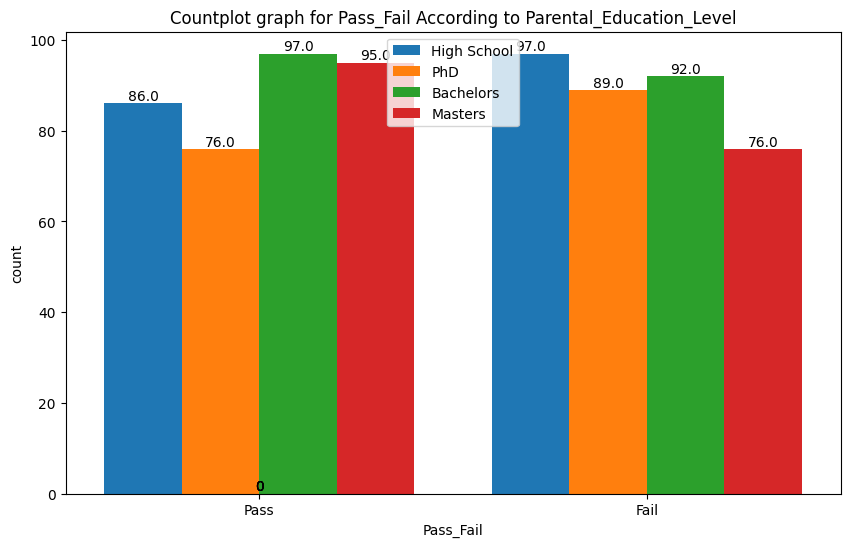

In [17]:
countplot(data,column='Pass_Fail',hue='Parental_Education_Level',text='Countplot graph for Pass_Fail According to Parental_Education_Level')

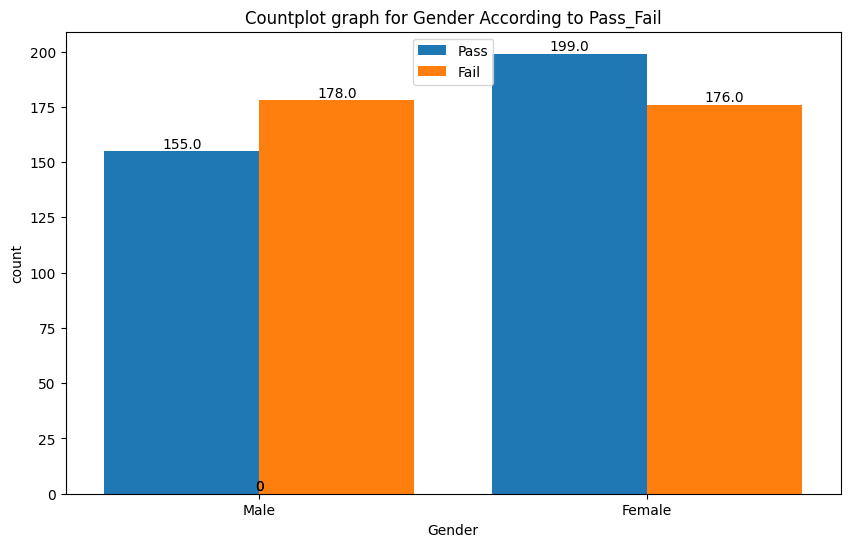

In [18]:
countplot(data,column='Gender',hue='Pass_Fail',text='Countplot graph for Gender According to Pass_Fail')

In [19]:
numerical_features = ['Study_Hours_per_Week', 'Attendance_Rate', 'Past_Exam_Scores', 'Final_Exam_Score']



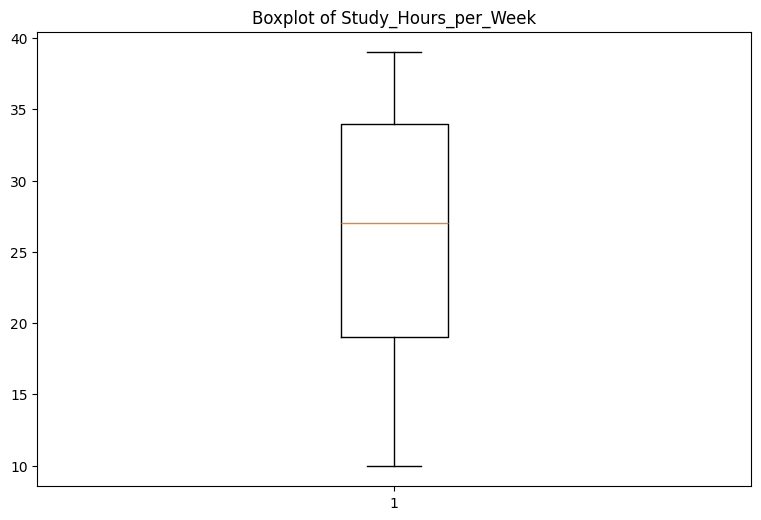

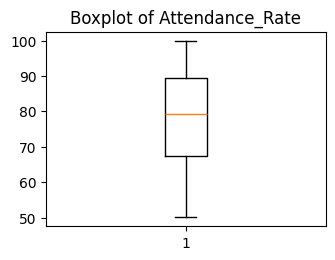

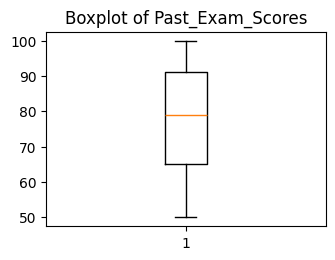

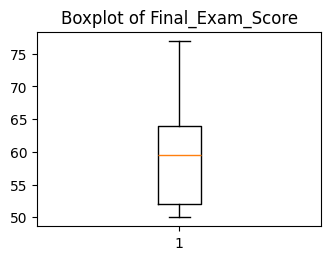

In [20]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    plt.boxplot(data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.tight_layout()
    plt.show()



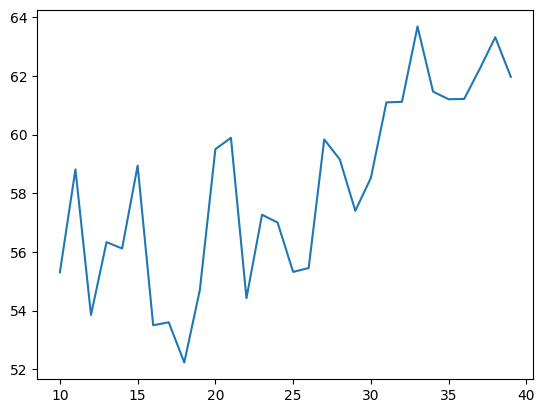

In [21]:
avg_performance = data.groupby('Study_Hours_per_Week')['Final_Exam_Score'].mean()
plt.plot(avg_performance.index, avg_performance.values)
plt.show()

In [22]:
# Drop the Student_ID column
data_cleaned = data.drop("Student_ID", axis=1)

# Confirm the column is dropped by checking the columns
print(data_cleaned.columns)


Index(['Gender', 'Study_Hours_per_Week', 'Attendance_Rate', 'Past_Exam_Scores',
       'Parental_Education_Level', 'Internet_Access_at_Home',
       'Extracurricular_Activities', 'Final_Exam_Score', 'Pass_Fail'],
      dtype='object')


In [23]:
data.head()

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass


In [24]:
data.shape

(708, 10)

In [25]:
data.drop("Student_ID", axis=1, inplace=True)

In [26]:
data.shape

(708, 9)

In [27]:
data.head()

,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,Male,16,78.222927,73,PhD,No,No,50,Fail
2,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,Female,37,98.655517,63,Masters,No,Yes,70,Pass


In [28]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_cols = ['Gender', 'Parental_Education_Level', 'Internet_Access_at_Home', 'Extracurricular_Activities', 'Pass_Fail']

# Apply label encoding to each categorical column
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Check the result
print(data.head())


   Gender  Study_Hours_per_Week  Attendance_Rate  Past_Exam_Scores  \
0       1                    31        68.267841                86   
1       1                    16        78.222927                73   
2       0                    21        87.525096                74   
3       0                    27        92.076483                99   
4       0                    37        98.655517                63   

   Parental_Education_Level  Internet_Access_at_Home  \
0                         1                        1   
1                         3                        0   
2                         3                        1   
3                         0                        0   
4                         2                        0   

   Extracurricular_Activities  Final_Exam_Score  Pass_Fail  
0                           1                63          1  
1                           0                50          0  
2                           0                55          0 

In [29]:
from sklearn.model_selection import train_test_split

# Separate features and target (choose the appropriate target for your task)
X = data.drop(['Final_Exam_Score', 'Pass_Fail'], axis=1)  # For regression, drop 'Pass_Fail'; for classification, drop 'Final_Exam_Score'
y = data['Final_Exam_Score']  # Replace with 'Pass_Fail' for classification

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
#preview x & y
# print(X.head())
# print(y.head())

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [50]:
import xgboost as xgb

# Initialize and train the model
model = xgb.XGBRegressor(objective='reg:squarederror')  # Use XGBClassifier for classification tasks
model.fit(X_train, y_train)




XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [61]:
# New data to test (must match your training columns exactly)
new_student = pd.DataFrame([{
    'Gender': 1,
    'Study_Hours_per_Week': 10,
    'Attendance_Rate': 50.0,
    'Past_Exam_Scores': 70,
    'Parental_Education_Level': 4,
    'Internet_Access_at_Home': 0,
    'Extracurricular_Activities': 1
}])

# Make prediction
prediction = model.predict(new_student)
print("Predicted value:", prediction[0])


Predicted value: 50.72203


In [42]:
model.save_model('xgb_model.json')

In [43]:
#download the model
from google.colab import files
files.download('xgb_model.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
# from sklearn.metrics import mean_squared_error

# # Make predictions
# y_pred = model.predict(X_test)

# # Evaluate (for regression)
# rmse = mean_squared_error(y_test, y_pred, squared=False)
# print("RMSE:", rmse)


from sklearn.metrics import mean_squared_error
import numpy as np

# Make predictions
y_pred = model.predict(X_test)

# Manually compute RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("RMSE:", rmse)



RMSE: 2.952232427787186


In [39]:
import xgboost as xgb
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [41]:
# # Predict using the trained model
# y_pred = model.predict(X_test)

# # Calculate the evaluation metrics
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = mean_squared_error(y_test, y_pred, squared=False)
# r2 = r2_score(y_test, y_pred)

# # Print the results
# print(f'Mean Absolute Error (MAE): {mae}')
# print(f'Mean Squared Error (MSE): {mse}')
# print(f'Root Mean Squared Error (RMSE): {rmse}')
# print(f'R^2 (Coefficient of Determination): {r2}')



from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict using the trained model
y_pred = model.predict(X_test)

# Calculate the evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Manually compute RMSE
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R^2 (Coefficient of Determination): {r2}')


Mean Absolute Error (MAE): 1.7020078897476196
Mean Squared Error (MSE): 8.715676307678223
Root Mean Squared Error (RMSE): 2.952232427787186
R^2 (Coefficient of Determination): 0.7951420545578003
